## Introduction

##### The chosen topic is to test the theory on whether the students test score is affected by the following three factors, such as:
##### 1. The test score is different by the gender of the students: to test the hypotesis whether the gender factor plays a role on the performance of students
##### 2. Does the test preperation course has an effect on the overall score of the subjects
##### 3. Does parental level of education plays a role in the test scores

##### An analysis have been done on the above mentioned hypothesis where charts were used to visualize the data comparison

### DONT FORGET TO FILL
##### Link to the original data source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
##### Data dictionary:
##### The raw data file (important for your instructor to run your code)

### Questions:
##### 1. Is there a difference in the average scores of math, reading, and writing between male and female students?
##### 2. Is there a relation between the test preperation course and the scores?
##### 3. Is there a relationship between the parental level of education and scores?

### Start of Analysis

In [7]:
import pandas as pd

In [9]:
students_per= pd.read_csv("StudentsPerformance.csv")
#Rename of the file

In [11]:
students_per.info()
#we used the informations function to visualize the data we have 
#in order to view whether the data requires cleaning or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Data Cleaning

In [14]:
students_per= students_per.drop(columns=['race/ethnicity','lunch'])
# we removed two columns that are not related to the Problem Statement (Race/Ethnicity & Lunch)

In [16]:
students_per.info()
# we used the function again to confirm that the columns have been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   test preparation course      1000 non-null   object
 3   math score                   1000 non-null   int64 
 4   reading score                1000 non-null   int64 
 5   writing score                1000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


#### 1. Is there a difference in the average scores of math, reading, and writing between male and female students?

In [19]:
cols_to_see1 = ["gender", "math score","reading score","writing score"]
students_per.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
# this method use to calculate the average of score of math , reading and writing according to gender (male & female)

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [53]:
# import the library i need to built the chart
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
average_scores = students_per.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

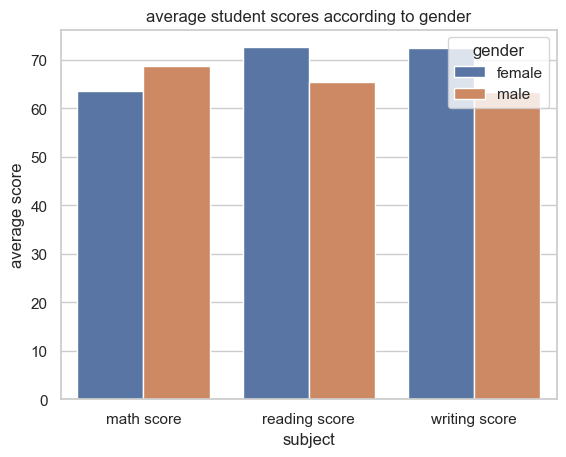

In [23]:
# convert the table to sutablr form for drawing
average_scores_melted = average_scores.melt(id_vars='gender', 
                                             var_name='Subject', 
                                             value_name='Average Score')

# draw the chart
sns.set(style="whitegrid")
sns.barplot(data=average_scores_melted, x='Subject', y='Average Score', hue='gender')

plt.title('average student scores according to gender')
plt.ylabel('average score')
plt.xlabel('subject')
plt.legend(title='gender')
plt.show()

#### 2. Is there a relation between the test preperation course and the scores and who score the highest and between both geders?

In [47]:
cols_to_see = ["test preparation course", "math score","reading score","writing score"]

students_per[cols_to_see].groupby(["test preparation course"]).mean()
# this was used to view the effect on test scores of those who have completed the test preperation course and didn't in general

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [70]:
cols_to_see = ["test preparation course", "math score", "reading score", "writing score"]
grouped_scores = students_per[cols_to_see].groupby("test preparation course").mean().reset_index()

In [72]:
grouped_scores_melted = grouped_scores.melt(id_vars='test preparation course', 
                                            var_name='Subject', 
                                            value_name='Average Score')

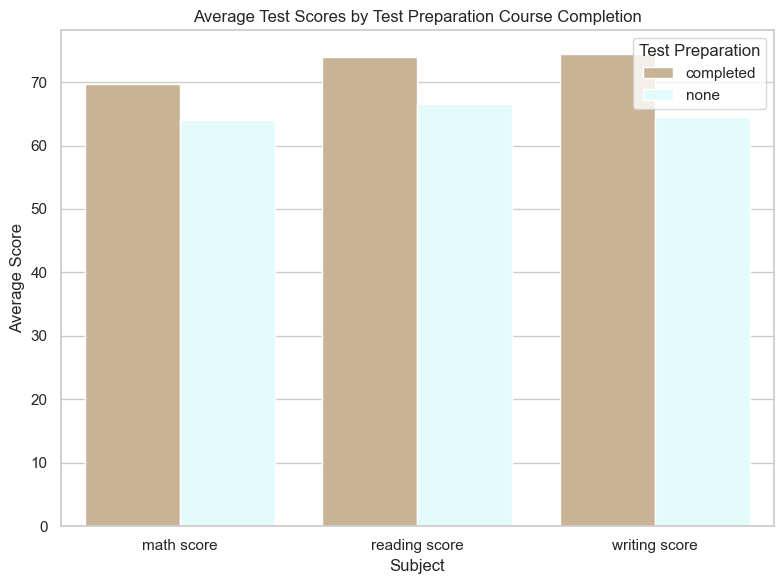

In [84]:
custom_palette = {
    'completed': 'tan',
    'none': 'lightcyan'
}

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(data=grouped_scores_melted, 
            x="Subject", 
            y="Average Score", 
            hue="test preparation course",
            palette=custom_palette)

plt.title("Average Test Scores by Test Preparation Course Completion")
plt.ylabel("Average Score")
plt.xlabel("Subject")
plt.legend(title="Test Preparation")
plt.tight_layout()
plt.show()

##### 3. Is there a relationship between the parental level of education and scores?

In [27]:
cols_to_see =["parental level of education", "math score"]
students_per[cols_to_see].groupby(["parental level of education"]).mean().sort_values(by='math score')

,math score
parental level of education,
high school,62.137755
some high school,63.497207
some college,67.128319
associate's degree,67.882883
bachelor's degree,69.389831
master's degree,69.745763


In [28]:
def avg(scores):
    return sum(scores)/3

In [29]:
#students_per.columns
students_per['avg score'] = students_per[['math score', 'reading score', 'writing score']].apply(avg, axis=1)

In [30]:
students_per

,gender,parental level of education,test preparation course,math score,reading score,writing score,avg score
0,female,bachelor's degree,none,72,72,74,72.666667
1,female,some college,completed,69,90,88,82.333333
2,female,master's degree,none,90,95,93,92.666667
3,male,associate's degree,none,47,57,44,49.333333
4,male,some college,none,76,78,75,76.333333
...,...,...,...,...,...,...,...
995,female,master's degree,completed,88,99,95,94.000000
996,male,high school,none,62,55,55,57.333333
997,female,high school,completed,59,71,65,65.000000
998,female,some college,completed,68,78,77,74.333333


In [31]:
cols_to_see =["parental level of education", "math score", "reading score", "writing score", "avg score"]
temp = students_per[cols_to_see].groupby(["parental level of education"]).mean().sort_values(by='avg score').reset_index()
temp

,parental level of education,math score,reading score,writing score,avg score
0,high school,62.137755,64.704082,62.448980,63.096939
1,some high school,63.497207,66.938547,64.888268,65.108007
2,some college,67.128319,69.460177,68.840708,68.476401
3,associate's degree,67.882883,70.927928,69.896396,69.569069
4,bachelor's degree,69.389831,73.000000,73.381356,71.923729
5,master's degree,69.745763,75.372881,75.677966,73.598870


<Axes: xlabel='parental level of education'>

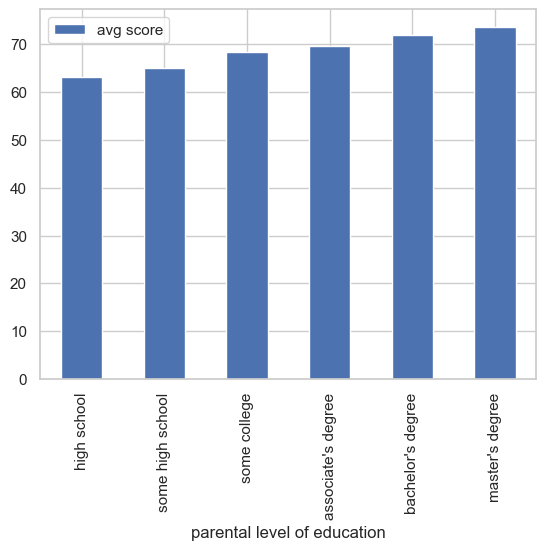

In [32]:
temp.plot(kind="bar", x="parental level of education", y="avg score")

## Conclusion - findings & Recommendation (to be filled after we are done from the analysis)

#### 1.

#### 2. It seems that there is slight difference of scores, which shows that the preparation courses does not have a significant impact on the results. 
#### We can say that the test preparation course does not improve/have an effect on the students' results.

#### 3. 